# Hand Writing Classification with Keras

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
len(x_train), len(x_test)

(60000, 10000)

In [14]:
len(y_train,), len(y_test)

(60000, 10000)

In [3]:
# Preprocess the data
x_train = x_train / 255.0  # Normalize pixel values to [0, 1]
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

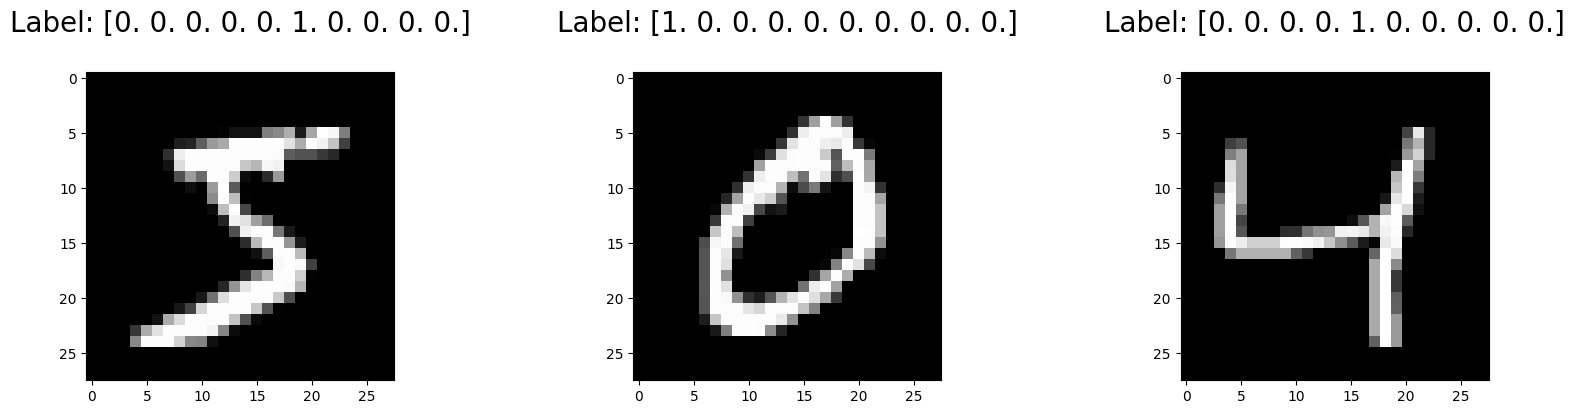

In [17]:
# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(x_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

In [6]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8553 - loss: 0.4810 - val_accuracy: 0.9615 - val_loss: 0.1325
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9649 - loss: 0.1175 - val_accuracy: 0.9654 - val_loss: 0.1124
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9750 - loss: 0.0791 - val_accuracy: 0.9673 - val_loss: 0.1035
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9831 - loss: 0.0545 - val_accuracy: 0.9717 - val_loss: 0.1008
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0433 - val_accuracy: 0.9706 - val_loss: 0.1032
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9889 - loss: 0.0325 - val_accuracy: 0.9727 - val_loss: 0.0988
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9703 - val_loss: 0.1079
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9915 - loss: 0.02

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9736 - loss: 0.1058

Test accuracy: 0.9736
